In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import statsmodels
import datetime
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [6]:
#impor the data
beer_df = pd.read_csv('BeerDataScienceProject.csv',encoding='iso-8859-1')

# Q1.
Answer:

The 3 unique breweries which produce the strongest beers are [ 6513,    35, 16866]


In [26]:
#this takes a pandas dataframe, sorts it based on ABV, and then returns and array of the top 3 unique breweries
beer_df.sort_values(by=['beer_ABV'],ascending=False)['beer_brewerId'].unique()[0:3]

array([ 6513,    35, 16866])

# Q2
Answer:

2000 saw the year with highest average rankings as seen in the graph and data table below.

In [79]:
# since the time column was in a unix time stamp, it had to be converted
beer_df['utc_time'] = beer_df['review_time'].apply(lambda x : datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%dT%H:%M:%SZ'))

In [87]:
#once the columns were converted the year could easliy be grabbed
beer_df['review_year']=beer_df['utc_time'].apply(lambda x : x[0:4])

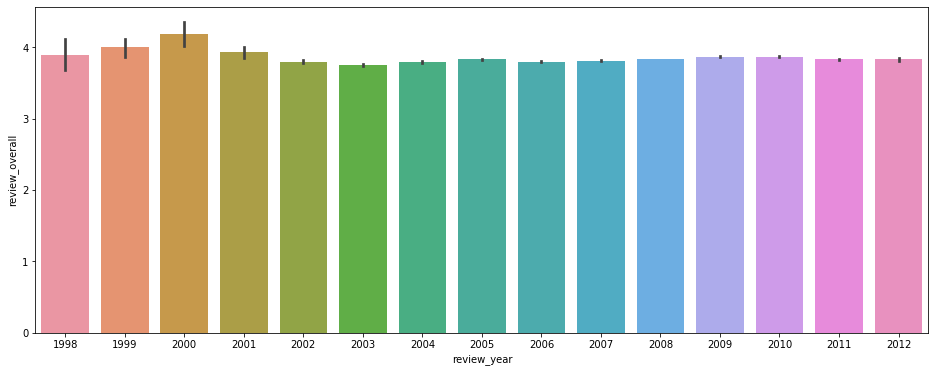

In [101]:
#increase the size of the graph displayed
plt.figure(figsize=(16, 6))

sns.barplot(x="review_year", y="review_overall", data=beer_df, estimator=np.mean)


In [102]:
beer_df.groupby('review_year')['review_overall'].mean()

review_year
1998    3.891304
1999    4.000000
2000    4.181818
2001    3.927741
2002    3.798905
2003    3.752900
2004    3.794630
2005    3.832042
2006    3.798192
2007    3.809552
2008    3.833939
2009    3.864390
2010    3.866139
2011    3.828093
2012    3.829717
Name: review_overall, dtype: float64

## Q3
Answer:

Since the variable we are trying to predict is an ordinal with intervals of .5 from 0-5, we must used an ordered logit model to predict it.  If we were to use a linear model we would have trouble interpreting the coefficients.  Python currently does not have any libraries that can satisfactorily model an ordered logit.  The regression model used can be found under "beer_regression.R".  The results are below:


|measurements|review_aroma|review_taste|review_appearance|review_palette|
|---|---|---|---|---|
|Odds Ratios|11.698266|3.290977|1.208751|1.270309|
|P Values|0|0|1.638669e-252|0|

As we can see with an odds ratio of 11.7, aroma is much more associated with a favorable final rating that the other variable, with taste coming in second with an odds ratio of 3.29.  All variable are statistically significant.  

# Q4

Answer:

I would probably recommend 19960,11757, and 34.  These beers have the highest ratings and the largest sample size.  

In [158]:
rec_beer = beer_df[(beer_df['review_overall']>=5.0)]

In [160]:
rec_beer['beer_beerId'].value_counts()

19960    520
11757    507
34       492
645      464
15881    462
        ... 
23696      1
35978      1
63673      1
7304       1
10285      1
Name: beer_beerId, Length: 3810, dtype: int64

# Q5

Answer:

For this question I am using the rules-based sentiment analysis library vader (https://github.com/cjhutto/vaderSentiment).  The beer that seems to be the favorite has an ID of 65758, it also has an overall score of a 4.

In [118]:
# instantiate sentiment analyzer object
sid = SentimentIntensityAnalyzer()

#loop over the text column and apply the polarity score for each comment.  
beer_df['COMPOUND_SENT'] = beer_df['review_text'].apply(lambda x: sid.polarity_scores(x)['compound'] if pd.isnull(x)==False else None)


In [128]:
# stores the grouped sentiment scores in a variable
beer_group = beer_df.groupby('beer_beerId')['COMPOUND_SENT'].mean()

In [134]:
#sorts the previously made variable
beer_group.sort_values(ascending=False)

beer_beerId
65758    0.9991
23795    0.9986
63248    0.9983
68059    0.9982
67719    0.9981
          ...  
56805   -0.9769
40954   -0.9804
5792    -0.9832
66812   -0.9851
66531   -0.9888
Name: COMPOUND_SENT, Length: 20200, dtype: float64

In [161]:
#information about the well reviewed beer
beer_df[beer_df['beer_beerId']==65758]

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,utc_time,review_year,COMPOUND_SENT
33171,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.0,4.5,4.5,bierenutz,5.0,"A-Poured into a glass, a dense, 2+ finger widt...",1268871332,2010-03-18T00:15:32Z,2010,0.0000
33172,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.5,4.5,4.0,Wisconsinality,4.5,Poured from 12oz bottle into a Chimay chalice....,1268870088,2010-03-17T23:54:48Z,2010,0.9503
33173,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,4.0,4.5,JoEBoBpr,4.5,Served in a oversized wine glass. This beer wa...,1268869242,2010-03-17T23:40:42Z,2010,0.9981
33174,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,5.0,4.0,4.0,5.0,TMoney2591,4.5,Served in a Dogfish Head snifter. Pours the wa...,1268855647,2010-03-17T19:54:07Z,2010,0.8306
33175,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.0,5.0,4.5,Jayli,5.0,Finally got my hands on some KBS!!! And damn i...,1268835567,2010-03-17T14:19:27Z,2010,0.9685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35098,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,5.0,4.5,4.5,beerfan99,5.0,May 2011 Vintage 12oz bottle consumed on 8/28/...,1314765365,2011-08-31T04:36:05Z,2011,0.9927
35099,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,5.0,5.0,5.0,5.0,Italktomyself77,5.0,This was a beer that I was very excited to fin...,1314759414,2011-08-31T02:56:54Z,2011,0.9605
35100,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,3.5,4.0,4.5,4.5,matttttYCE,4.5,Appearance - A little more than a finger high ...,1314680520,2011-08-30T05:02:00Z,2011,0.9965
35101,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,5.0,5.0,5.0,doughanson78,4.5,12oz bottle poured into a tulip. HUGE thanks t...,1314462886,2011-08-27T16:34:46Z,2011,0.9876
